In [1]:
#imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#importing the mnist data

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#creating training and validation sets
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [4]:
#standardization of data

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

#adding a new axis 
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [21]:
#creating the model

model = Sequential([
  Conv2D(filters=64, kernel_size=7, padding='SAME', activation='relu',input_shape=[28, 28, 1]),
  MaxPool2D(pool_size=2),
  Conv2D(filters=128, kernel_size=3, padding='SAME', activation='relu'),
  Conv2D(filters=128, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(units=128, activation='relu'),
  Dense(units=10, activation='softmax'),
])

In [22]:
#compiling the model

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [24]:
# fitting the model

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.2416 - accuracy: 0.9230 - val_loss: 0.0612 - val_accuracy: 0.9838
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0459 - accuracy: 0.9863 - val_loss: 0.0410 - val_accuracy: 0.9910
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0420 - val_accuracy: 0.9910
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0423 - val_accuracy: 0.9908
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0603 - val_accuracy: 0.9870
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0247 - accuracy: 0.9928 - val_loss: 0.0451 - val_accuracy: 0.9924
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0434 - val_accuracy

In [25]:
y_pred = model.predict(X_test)

In [26]:
pred = []
for i in range(len(X_test)):
   pred.append(np.argmax(y_pred[i]))

In [27]:
pred = np.array(pred)

In [28]:
precision_score(y_test, pred, average="macro")

0.9916046980398612

In [29]:
recall_score(y_test, pred, average='macro')

0.9917301265187369

In [30]:
f1_score(y_test, pred, average='macro')

0.9916579972780573

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1824.2184 - accuracy: 0.9917


[1824.2183837890625, 0.9916999936103821]

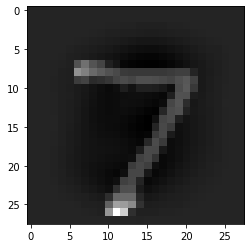

In [32]:
plt.imshow(X_test[0][:, :, 0], cmap='gray')      #the image at X-test[0]
plt.show()

In [33]:
pred[0]      #the prediction  of model at X_test[0]

7